# My Project

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

**Our stakeholders want to know the following:**

   -  Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
   -  Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**We will combine the results for both surveys to answer these questions.**


# Introduction

First, we'll read in the datasets and do some initial exporation.


In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('C:\\Users\\MY PC\\desktop\\DATASETS\\dete-exit-survey-january-2014.csv')

In [3]:
tafe_survey = pd.read_csv('C:\\Users\\MY PC\\desktop\\DATASETS\\tafe-employee-exit-survey-access-database-december-2013.csv',encoding='cp1252')

In [4]:
dete_survey.info

<bound method DataFrame.info of       ID                        SeparationType Cease Date DETE Start Date  \
0      1                 Ill Health Retirement    08/2012            1984   
1      2      Voluntary Early Retirement (VER)    08/2012      Not Stated   
2      3      Voluntary Early Retirement (VER)    05/2012            2011   
3      4             Resignation-Other reasons    05/2012            2005   
4      5                        Age Retirement    05/2012            1970   
..   ...                                   ...        ...             ...   
817  819                        Age Retirement    02/2014            1977   
818  820                        Age Retirement    01/2014            1980   
819  821  Resignation-Move overseas/interstate    01/2014            2009   
820  822                 Ill Health Retirement    12/2013            2001   
821  823  Resignation-Move overseas/interstate    12/2013      Not Stated   

    Role Start Date                        

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
#Quick exploration of the data
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  



We can make the following observations based on the work above:

   - The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
   - Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
   - Each dataframe contains many of the same columns, but the column names are different.
   - There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.




# Identify Missing Values and Drop Unneccessary Columns

First, we'll correct the Not Stated values and drop some of the columns we don't need for our analysis.


In [8]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('C:\\Users\\MY PC\\desktop\\DATASETS\\dete-exit-survey-january-2014.csv', na_values='Not Stated')

# Quick exploration of the data
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
# Remove columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact


# Rename Columns

Next, we'll standardize the names of the columns we want to work with, because we eventually want to combine the dataframes.


In [10]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check that the column names were updated correctly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

# Filter the Data

For this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.


In [12]:
# Check the unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
# Check the unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]


In [15]:
# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [16]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Verify the Data

Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

 - Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
 - Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.



In [17]:
# Check the unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str[-4:]



In [19]:
dete_resignations['cease_date']=dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['dete_start_date'].value_counts()


2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [21]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Below are our findings :
 - The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.


# Create a new Column

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. 

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

   - Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?


`tafe_resignations` dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in `dete_resignations` .

In [22]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()


5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

We created a new `institute_service` column in the `dete_resignation` that we'll use to analyze survey respondents according to their length of employment

# Identify Dissatisfied Employees

 Next we'll identify employees who resigned because they were dissatisfied

In [23]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

In [24]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
   1. tafe_survey_updated:
        - `Contributing Factors. Dissatisfaction`
        - `Contributing Factors. Job Dissatisfaction`
   2. dafe_survey_updated:
        - `job_dissatisfaction`
        - `dissatisfaction_with_the_department`
        - `physical_work_environment`
        - `lack_of_recognition`
        - `lack_of_job_security`
        - `work_location`
        - `employment_conditions`
        - `work_life_balance`
        - `workload`


If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

   - `True`: indicates a person resigned because they were dissatisfied in some way
   - `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
   - `NaN`: indicates the value is missing


In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

In [27]:
def update_vals(val):
    if pd.isnull(val) :
        return np.nan
    elif val =='-': 
        return False
    else:
        return True
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [28]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [29]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [30]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

We have been able to create a new column `dissatisfied` for both dataframes indicating whether the employee resigned because of some dissatisfaction

# Combine the Data

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [31]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'



In [32]:
combined = pd.concat([dete_resignations_up ,tafe_resignations_up],ignore_index=True)

We still have some columns left in the dataframe that we don't need to complete our analysis, We will drop any columns with less than 500 non null values.

In [33]:
combined_updated = combined.dropna(thresh=500,axis=1)

# Cleaning the Service Column

In [34]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


We will clean the `institute column` and categorize employees according to the following definitions. 
We'll use the slightly modified definitions below:

   - `New`: Less than 3 years at a company
   - `Experienced`: 3-6 years at a company
   - `Established`: 7-10 years at a company
   - `Veteran`: 11 or more years at a company
 


 Our analysis is based on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.


In [35]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


<ipython-input-35-c101a5b9eea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
<ipython-input-35-c101a5b9eea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


In [36]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [37]:
combined_updated['institute_service_up']

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service_up, Length: 651, dtype: float64

In [38]:
def map_service(col):
    if col < 3:
        return 'New'
    elif col >= 3 and col <= 6:
        return 'Experienced'
    elif col >=7 and col <=10:
        return 'Established'
    elif pd.isnull(col):
        return np.nan
    else:
        return 'Veteran'
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(map_service)
combined_updated['service_cat'].copy()


<ipython-input-38-0cf6a7758583>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(map_service)


0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

We have cleaned the `institute_service` column by extracting the years and classifying them in a new column whuch is the `service_cat`column based on the years they have spent in the workplace.

   - `New`: Less than 3 years at a company
   - `Experienced`: 3-6 years at a company
   - `Established`: 7-10 years at a company
   - `Veteran`: 11 or more years at a company


# Performing some Initial Analysis

In [39]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, `False`. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.


In [40]:
# replace the missing value with the most frequent value, false
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)


<ipython-input-40-bb0f8e4911b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)


False    411
True     240
Name: dissatisfied, dtype: int64

In [41]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_percent = combined_updated.pivot_table(index='service_cat',values='dissatisfied')

In [42]:
dis_percent

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


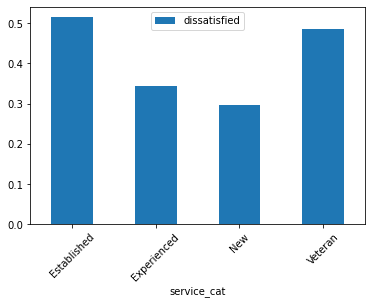

In [44]:
# plot the results
%matplotlib inline
dis_percent.plot(kind='bar',rot='45')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.